<a href="https://colab.research.google.com/github/abdulrahman-nuzha/HeartDisease/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
import seaborn as sns

#Dataset

In [2]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease

 96% 3.00M/3.13M [00:00<00:00, 5.78MB/s]
100% 3.13M/3.13M [00:00<00:00, 5.09MB/s]


In [7]:
! unzip personal-key-indicators-of-heart-disease.zip -d personal-key-indicators-of-heart-disease

Archive:  personal-key-indicators-of-heart-disease.zip
  inflating: personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv  


In [8]:
df = pd.read_csv('/content/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
df.isnull().sum().sort_values(ascending=False)

HeartDisease        0
BMI                 0
KidneyDisease       0
Asthma              0
SleepTime           0
GenHealth           0
PhysicalActivity    0
Diabetic            0
Race                0
AgeCategory         0
Sex                 0
DiffWalking         0
MentalHealth        0
PhysicalHealth      0
Stroke              0
AlcoholDrinking     0
Smoking             0
SkinCancer          0
dtype: int64

In [11]:
x = df.loc[: , df.columns != 'HeartDisease']
y = df['HeartDisease']

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2)

#Preprocessing X

##Label Encoder

In [13]:
x_train['PhysicalActivity'].unique().size

2

In [14]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

# Fit and transform on x_train
tmp = x_train['PhysicalActivity'].values.ravel()
x_train['PhysicalActivity'] = l.fit_transform(tmp)

# Transform on x_test using the parameters from x_train
tmp = x_test['PhysicalActivity'].values.ravel()
x_test['PhysicalActivity'] = l.transform(tmp)

In [15]:
x_train['Asthma'].unique().size

2

In [16]:
l = LabelEncoder()

# Fit and transform on x_train
tmp = x_train['Asthma'].values.ravel()
x_train['Asthma'] = l.fit_transform(tmp)

# Transform on x_test using the parameters from x_train
tmp = x_test['Asthma'].values.ravel()
x_test['Asthma'] = l.transform(tmp)

In [17]:
x_train['KidneyDisease'].unique().size

2

In [18]:
l = LabelEncoder()

# Fit and transform on x_train
tmp = x_train['KidneyDisease'].values.ravel()
x_train['KidneyDisease'] = l.fit_transform(tmp)

# Transform on x_test using the parameters from x_train
tmp = x_test['KidneyDisease'].values.ravel()
x_test['KidneyDisease'] = l.transform(tmp)

In [19]:
x_train['SkinCancer'].unique().size

2

In [20]:
l = LabelEncoder()

# Fit and transform on x_train
tmp = x_train['SkinCancer'].values.ravel()
x_train['SkinCancer'] = l.fit_transform(tmp)

# Transform on x_test using the parameters from x_train
tmp = x_test['SkinCancer'].values.ravel()
x_test['SkinCancer'] = l.transform(tmp)

In [21]:
x['Smoking'].unique().size

2

In [22]:
l = LabelEncoder()

# Fit and transform on x_train
tmp = x_train['Smoking'].values.ravel()
x_train['Smoking'] = l.fit_transform(tmp)

# Transform on x_test using the parameters from x_train
tmp = x_test['Smoking'].values.ravel()
x_test['Smoking'] = l.transform(tmp)

In [23]:
x_train['AlcoholDrinking'].unique().size

2

In [24]:
l = LabelEncoder()

# Fit and transform on x_train
tmp = x_train['AlcoholDrinking'].values.ravel()
x_train['AlcoholDrinking'] = l.fit_transform(tmp)

# Transform on x_test using the parameters from x_train
tmp = x_test['AlcoholDrinking'].values.ravel()
x_test['AlcoholDrinking'] = l.transform(tmp)

In [25]:
x_train['DiffWalking'].unique().size

2

In [26]:
l = LabelEncoder()

# Fit and transform on x_train
tmp = x_train['DiffWalking'].values.ravel()
x_train['DiffWalking'] = l.fit_transform(tmp)

# Transform on x_test using the parameters from x_train
tmp = x_test['DiffWalking'].values.ravel()
x_test['DiffWalking'] = l.transform(tmp)

In [27]:
x_train['Sex'].unique().size

2

In [28]:
l = LabelEncoder()

# Fit and transform on x_train
tmp = x_train['Sex'].values.ravel()
x_train['Sex'] = l.fit_transform(tmp)

# Transform on x_test using the parameters from x_train
tmp = x_test['Sex'].values.ravel()
x_test['Sex'] = l.transform(tmp)

In [29]:
x_train['Stroke'].unique().size

2

In [30]:
l = LabelEncoder()

# Fit and transform on x_train
tmp = x_train['Stroke'].values.ravel()
x_train['Stroke'] = l.fit_transform(tmp)

# Transform on x_test using the parameters from x_train
tmp = x_test['Stroke'].values.ravel()
x_test['Stroke'] = l.transform(tmp)

In [31]:
x_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
50555,23.75,1,0,0,0.0,30.0,1,1,60-64,Black,No,0,Fair,8.0,0,1,0
281263,22.24,0,0,0,4.0,0.0,0,0,55-59,White,No,1,Excellent,8.0,0,0,0
246896,26.63,0,0,0,1.0,0.0,0,1,55-59,White,No,1,Very good,7.0,0,0,1
46463,27.32,0,0,0,30.0,5.0,0,1,55-59,Black,"No, borderline diabetes",1,Fair,9.0,0,0,0
31755,31.93,0,0,0,30.0,5.0,1,0,40-44,White,No,0,Poor,6.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,31.52,0,0,0,0.0,1.0,0,1,60-64,White,"No, borderline diabetes",1,Very good,7.0,0,0,0
94660,18.31,0,0,0,0.0,30.0,0,1,18-24,White,No,1,Excellent,6.0,0,0,0
187762,36.58,1,1,0,0.0,23.0,0,0,50-54,White,Yes (during pregnancy),1,Good,6.0,0,0,0
263886,44.01,0,0,0,0.0,5.0,0,0,35-39,Hispanic,No,0,Fair,8.0,0,0,0


## OneHot Encoder

In [32]:
x_train['Race'].unique().size

6

In [33]:
print(np.unique(x_train['Race'].values))
print(x_train['Race'].unique().size)

['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
6


In [34]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore')
OHE.fit(x_train[['Race']])

x_train['Race'] = OHE.transform(x_train[['Race']])
x_test['Race'] = OHE.transform(x_test[['Race']])

In [36]:
print(np.unique(x_train['AgeCategory'].values))
print(x_train['AgeCategory'].unique().size)

['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
13


In [37]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore')
OHE.fit(x_train[['AgeCategory']])

x_train['AgeCategory'] = OHE.transform(x_train[['AgeCategory']])
x_test['AgeCategory'] = OHE.transform(x_test[['AgeCategory']])

In [38]:
print(np.unique(x_train['Diabetic'].values))
print(x_train['Diabetic'].unique().size)

['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
4


In [39]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore')
OHE.fit(x_train[['Diabetic']])

x_train['Diabetic'] = OHE.transform(x_train[['Diabetic']])
x_test['Diabetic'] = OHE.transform(x_test[['Diabetic']])

In [40]:
print(np.unique(x_train['GenHealth'].values))
print(x_train['GenHealth'].unique().size)

['Excellent' 'Fair' 'Good' 'Poor' 'Very good']
5


In [41]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore')
OHE.fit(x_train[['GenHealth']])

x_train['GenHealth'] = OHE.transform(x_train[['GenHealth']])
x_test['GenHealth'] = OHE.transform(x_test[['GenHealth']])

## Normalization

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train['BMI'] = scaler.fit_transform(x_train[['BMI']])
x_test['BMI'] = scaler.transform(x_test[['BMI']])

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train['MentalHealth'] = scaler.fit_transform(x_train[['MentalHealth']])
x_test['MentalHealth'] = scaler.transform(x_test[['MentalHealth']])

In [44]:
x_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
50555,1.0,1,0,0,0.0,1.000000,1,1,0.0,0.0,1.0,0,0.0,8.0,0,1,0
281263,0.0,0,0,0,4.0,0.000000,0,0,0.0,0.0,1.0,1,1.0,8.0,0,0,0
246896,0.0,0,0,0,1.0,0.000000,0,1,0.0,0.0,1.0,1,0.0,7.0,0,0,1
46463,1.0,0,0,0,30.0,0.166667,0,1,0.0,0.0,0.0,1,0.0,9.0,0,0,0
31755,0.0,0,0,0,30.0,0.166667,1,0,0.0,0.0,1.0,0,0.0,6.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,0.0,0,0,0,0.0,0.033333,0,1,0.0,0.0,0.0,1,0.0,7.0,0,0,0
94660,0.0,0,0,0,0.0,1.000000,0,1,1.0,0.0,1.0,1,1.0,6.0,0,0,0
187762,0.0,1,1,0,0.0,0.766667,0,0,0.0,0.0,0.0,1,0.0,6.0,0,0,0
263886,1.0,0,0,0,0.0,0.166667,0,0,0.0,0.0,1.0,0,0.0,8.0,0,0,0


#Preprocessing Y

In [45]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

# Fit and transform on y_train
tmp = y_train.ravel()
y_train = l.fit_transform(tmp)

# Transform on y_test using the parameters from y_train
tmp = y_test.ravel()
y_test = l.transform(tmp)

In [46]:
y

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object

In [47]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

# Models

In [48]:
y_train.shape

(255836,)

In [49]:
x_train.shape

(255836, 17)

##SVM

In [ ]:
#It takes a long time

In [ ]:
# # Define the parameter grid to search over
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'sigmoid']
# }

# # Perform grid search with 5-fold cross-validation
# grid_search = GridSearchCV(svc, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

In [ ]:
# Print the best hyperparameters and corresponding score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(C = 1,kernel = 'sigmoid')
svc.fit(x_train,y_train)

SVC(C=1, kernel='sigmoid')

In [51]:
svc_train = svc.score(x_train,y_train)
svc_test = svc.score(x_test,y_test)

print(' TEST : ',svc_test)
print(' TRAIN : ',svc_train)

svm_predicted = svc.predict(x_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)
svm_classification_report = classification_report(y_test, svm_predicted, target_names = ['0', '1'])
print('SVM \n', svm_classification_report)

 TEST :  0.8482152629027971
 TRAIN :  0.8470739067214934
Support vector machine classifier (linear kernel, C=1)
 [[53725  4862]
 [ 4846   526]]
SVM 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     58587
           1       0.10      0.10      0.10      5372

    accuracy                           0.85     63959
   macro avg       0.51      0.51      0.51     63959
weighted avg       0.85      0.85      0.85     63959



##Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

c_values = [0.01, 0.1, 1, 10, 100]

k = 5

# Initialize an array to store the cross-validation scores for each value of C
scores = np.zeros(len(c_values))

# Split the data into K folds
kf = KFold(n_splits=k, shuffle=True)

# Perform cross-validation for each value of C
for i, c in enumerate(c_values):
    # Initialize an array to store the validation scores for each fold
    fold_scores = np.zeros(k)

    # Train and evaluate the model for each fold
    for j, (train_idx, val_idx) in enumerate(kf.split(x_train)):
        # Split the data into training and validation sets
        x_train_k, y_train_k = x_train.iloc[train_idx], y_train[train_idx]
        x_val_k, y_val_k = x_train.iloc[val_idx], y_train[val_idx]

        # Train a logistic regression model with the current value of C
        model = LogisticRegression(C=c,max_iter = 100000)
        model.fit(x_train_k, y_train_k)

        # Evaluate the model on the validation set
        y_pred = model.predict(x_val_k)
        fold_scores[j] = accuracy_score(y_val_k, y_pred)

    # Calculate the average validation score across all folds
    scores[i] = np.mean(fold_scores)

# Print the scoress array
for i,value in enumerate(scores):
  print("Accuracy :",value,",C value :",c_values[i])

# Choose the value of C with the highest cross-validation score
best_c = c_values[np.argmax(scores)]

# Train the final model on the entire training set using the best value of C
LR = LogisticRegression(C=best_c,max_iter = 100000)
LR.fit(x_train, y_train)

Accuracy : 0.9146132683278594 ,C value : 0.01
Accuracy : 0.9147813419712001 ,C value : 0.1
Accuracy : 0.914793073473753 ,C value : 1
Accuracy : 0.9148634272728673 ,C value : 10
Accuracy : 0.914796980715259 ,C value : 100


LogisticRegression(C=10, max_iter=100000)

In [53]:
LR_train = LR.score(x_train,y_train)
LR_test = LR.score(x_test,y_test)

print(' TEST : ',LR_test)
print(' TRAIN : ',LR_train)

lr_predicted = LR.predict(x_test)
confusion = confusion_matrix(y_test, lr_predicted)
lr_classification_report = classification_report(y_test, lr_predicted, target_names = ['0', '1'])

print('Logistic regression classifier\n', confusion)
print('Log\n', lr_classification_report)

 TEST :  0.9166653637486515
 TRAIN :  0.9148829719038759
Logistic regression classifier
 [[58205   382]
 [ 4948   424]]
Log
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     58587
           1       0.53      0.08      0.14      5372

    accuracy                           0.92     63959
   macro avg       0.72      0.54      0.55     63959
weighted avg       0.89      0.92      0.89     63959



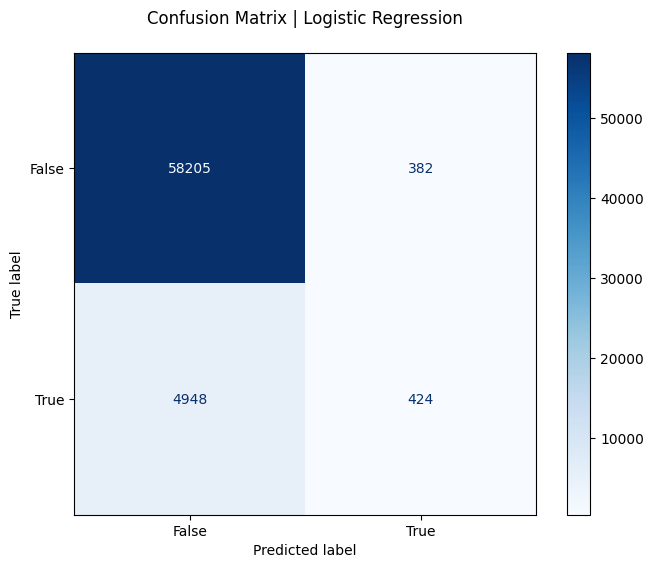

In [54]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

# Plot the confusion matrix heatmap with a title
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Confusion Matrix | Logistic Regression\n')

# Show the plot
plt.show()

##Gaussian

In [55]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [56]:
gnb_train = gnb.score(x_train,y_train)
gnb_test = gnb.score(x_test,y_test)

print(' TEST : ',gnb_test)
print(' TRAIN : ',gnb_train)

gnb_predicted = gnb.predict(x_test)
confusion = confusion_matrix(y_test, gnb_predicted)
gnb_classification_report = classification_report(y_test, gnb_predicted, target_names = ['0', '1'])

print('GaussianNBn classifier\n', confusion)
print('GaussianNB\n', gnb_classification_report)

 TEST :  0.8086117669131787
 TRAIN :  0.8056723838709173
GaussianNBn classifier
 [[48670  9917]
 [ 2324  3048]]
GaussianNB
               precision    recall  f1-score   support

           0       0.95      0.83      0.89     58587
           1       0.24      0.57      0.33      5372

    accuracy                           0.81     63959
   macro avg       0.59      0.70      0.61     63959
weighted avg       0.89      0.81      0.84     63959



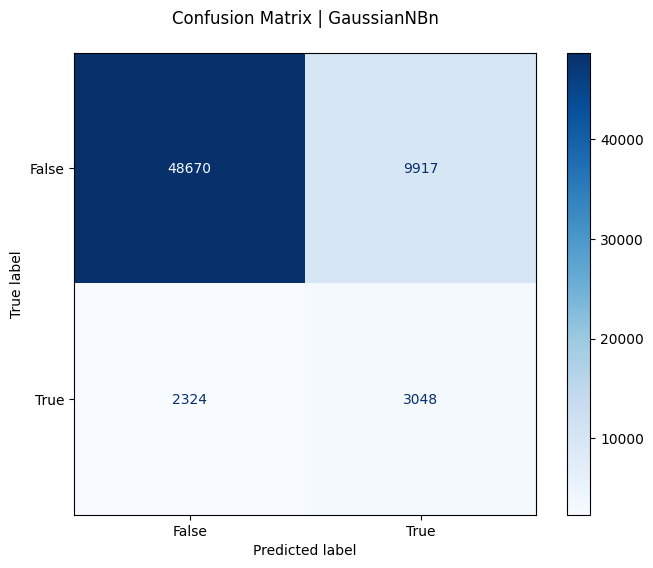

In [57]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

# Plot the confusion matrix heatmap with a title
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Confusion Matrix | GaussianNBn\n')

# Show the plot
plt.show()

##KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define a range of values for k to try
k_range = range(10, 15)

# Define a list to store the cross-validation scores
cv_scores = []

# Loop over the range of k values and compute the scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the k value with the highest score
best_k = k_range[np.argmax(cv_scores)]

In [59]:
# Train the KNN model using the best value of k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [60]:
knn_train = knn.score(x_train,y_train)
knn_test = knn.score(x_test,y_test)
print(' TEST : ',knn_test)
print(' TRAIN : ',knn_train)

knn_predicted = knn.predict(x_test)
confusion = confusion_matrix(y_test, knn_predicted)
knn_classification_report = classification_report(y_test, knn_predicted, target_names = ['0', '1'])

print('KNeighborsClassifier\n', confusion)
print('KNeighbors\n',knn_classification_report)

 TEST :  0.9161025031660908
 TRAIN :  0.915985240544724
KNeighborsClassifier
 [[58446   141]
 [ 5225   147]]
KNeighbors
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     58587
           1       0.51      0.03      0.05      5372

    accuracy                           0.92     63959
   macro avg       0.71      0.51      0.50     63959
weighted avg       0.88      0.92      0.88     63959



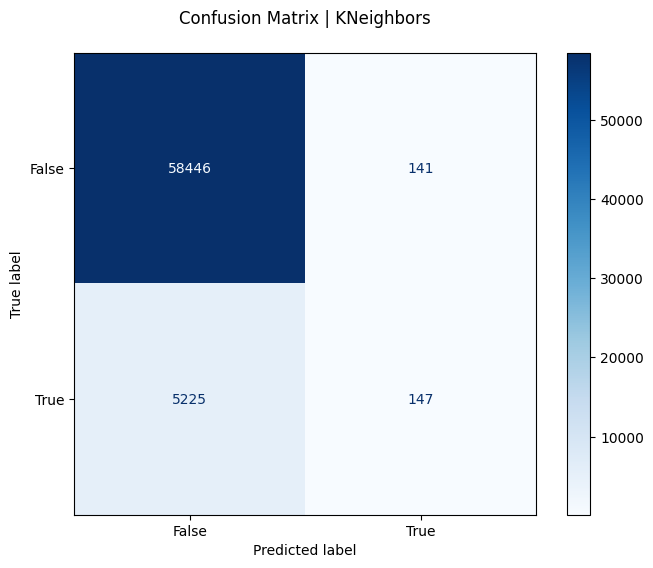

In [61]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

# Plot the confusion matrix heatmap with a title
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Confusion Matrix | KNeighbors\n')

# Show the plot
plt.show()

##DecisionTreeClassifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=25).fit(x_train, y_train)

In [63]:
dt_train = dt.score(x_train,y_train)
dt_test = dt.score(x_test,y_test)

print(' TEST : ',dt_train)
print(' TRAIN : ',dt_test)

tree_predicted = dt.predict(x_test)
confusion = confusion_matrix(y_test, tree_predicted)
dt_classification_report = classification_report(y_test, tree_predicted, target_names=['Not 1', '1'],zero_division='warn')
print('Decision tree classifier (max_depth = 25)\n', confusion)
print('Decision tree\n',dt_classification_report)

 TEST :  0.9465008833784143
 TRAIN :  0.898466204912522
Decision tree classifier (max_depth = 25)
 [[56707  1880]
 [ 4614   758]]
Decision tree
               precision    recall  f1-score   support

       Not 1       0.92      0.97      0.95     58587
           1       0.29      0.14      0.19      5372

    accuracy                           0.90     63959
   macro avg       0.61      0.55      0.57     63959
weighted avg       0.87      0.90      0.88     63959



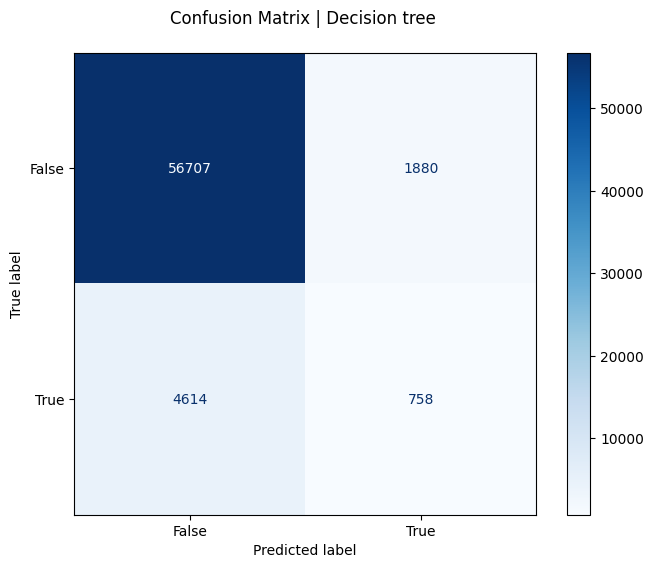

In [64]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

# Plot the confusion matrix heatmap with a title
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Confusion Matrix | Decision tree \n')

# Show the plot
plt.show()

#Comparisons

In [66]:
from tabulate import tabulate
headers = ["Classifier", "Results"]
table = [
    ["Support Vector Machine", svm_classification_report],
    ["Logistic regression",lr_classification_report],
    ["Decision tree",dt_classification_report],
    ["KNeighbors",knn_classification_report],
    ["GaussianNB",gnb_classification_report],
]
print(tabulate(table, headers=headers,stralign='center', tablefmt='grid', numalign='center', colalign=('center', 'center')))

+------------------------+-------------------------------------------------------+
|       Classifier       |                        Results                        |
+========================+=======================================================+
| Support Vector Machine |        precision    recall  f1-score   support        |
|                        |                                                       |
|                        |            0       0.92      0.92      0.92     58587 |
|                        |            1       0.10      0.10      0.10      5372 |
|                        |                                                       |
|                        |     accuracy                           0.85     63959 |
|                        |    macro avg       0.51      0.51      0.51     63959 |
|                        | weighted avg       0.85      0.85      0.85     63959 |
+------------------------+-------------------------------------------------------+
|  L

In [67]:
from tabulate import tabulate
headers = ["Classifier", "Train", "Test"]
table = [
    ["Support Vector Machine", svc_train,svc_test],
    ["Logistic regression",LR_train,LR_test],
    ["Decision tree",dt_train,dt_test],
    ["KNeighbors",knn_train,knn_test],
    ["GaussianNB",gnb_train,gnb_test],
]
print(tabulate(table, headers=headers,stralign='center', tablefmt='grid', numalign='center', colalign=('center', 'center')))

+------------------------+----------+----------+
|       Classifier       |  Train   |   Test   |
+========================+==========+==========+
| Support Vector Machine | 0.847074 | 0.848215 |
+------------------------+----------+----------+
|  Logistic regression   | 0.914883 | 0.916665 |
+------------------------+----------+----------+
|     Decision tree      | 0.946501 | 0.898466 |
+------------------------+----------+----------+
|       KNeighbors       | 0.915985 | 0.916103 |
+------------------------+----------+----------+
|       GaussianNB       | 0.805672 | 0.808612 |
+------------------------+----------+----------+


# Plots

In [78]:
def prc(classifier):
  from sklearn.metrics import precision_recall_curve

  classifier_probs = classifier.predict_proba(x_test)
  classifier_probs = classifier_probs[:, 1]

  precision, recall, thresholds = precision_recall_curve(y_test, classifier_probs)
  closest_zero = np.argmin(np.abs(thresholds))
  closest_zero_p = precision[closest_zero]
  closest_zero_r = recall[closest_zero]

  plt.figure()
  plt.xlim([0.0, 1.01])
  plt.ylim([0.0, 1.01])
  plt.plot(recall, precision, label='Precision-Recall Curve')
  plt.plot(closest_zero_r, closest_zero_p, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
  plt.xlabel('Recall', fontsize=16)
  plt.ylabel('Precision', fontsize=16)
  plt.show()

In [69]:
!pip install scikit-plot

In [70]:
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

def roc(classifier):
  y_pred_proba = classifier.predict_proba(x_test)
  skplt.metrics.plot_precision_recall(y_test, y_pred_proba)
  plt.show()

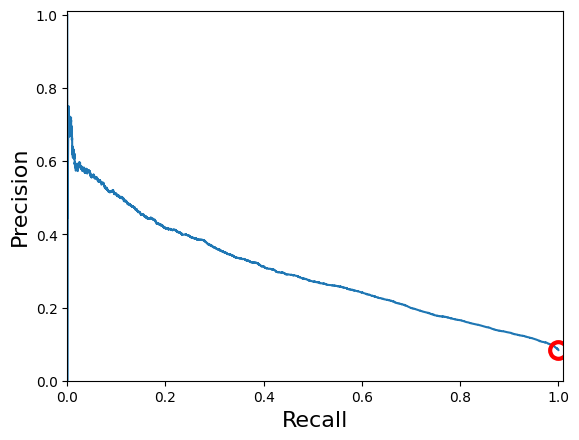

In [79]:
prc(LR)

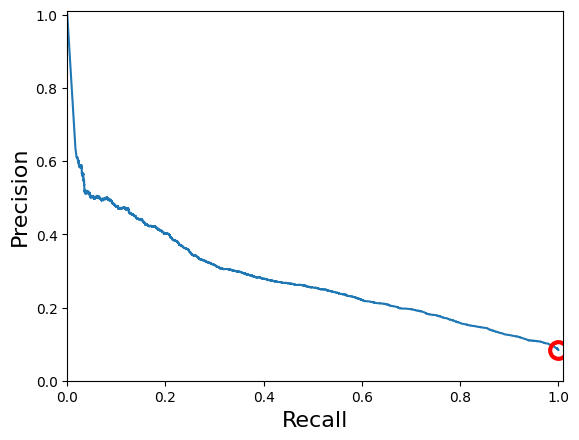

In [80]:
prc(gnb)

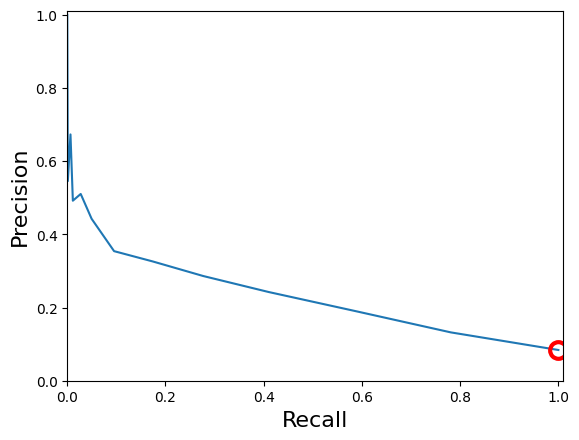

In [81]:
prc(knn)

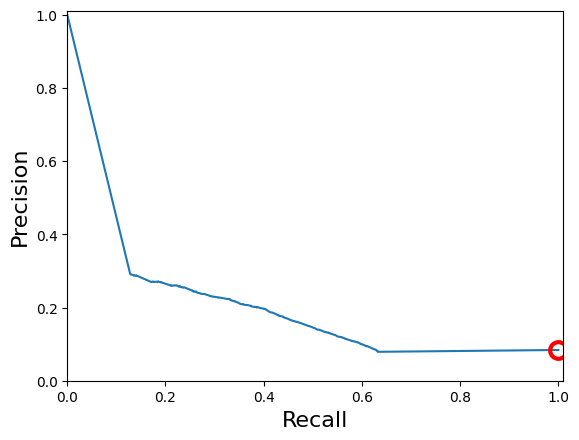

In [82]:
prc(dt)

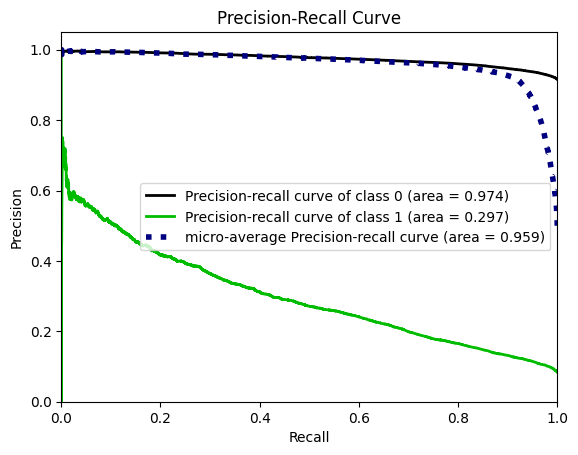

In [84]:
roc(LR)

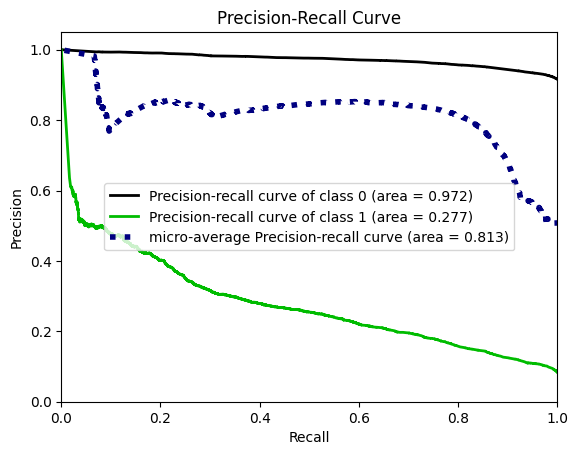

In [85]:
roc(gnb)

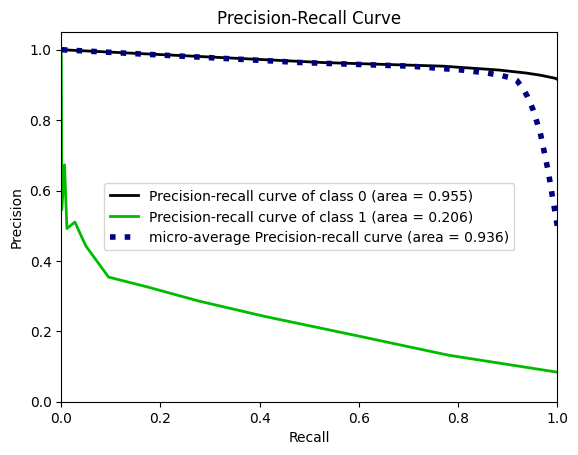

In [86]:
roc(knn)

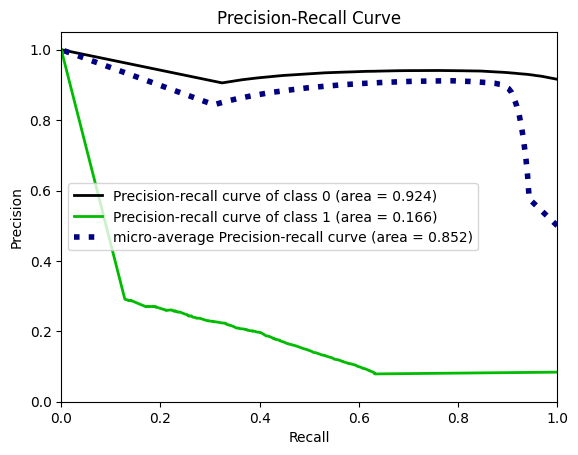

In [87]:
roc(dt)

In [88]:
from sklearn.metrics import roc_curve, auc
def logRege_roc_curve(classifier):

  cls = classifier
  y_score_cls = cls.fit(x_train, y_train).predict_proba(x_test)[:, 1]
  fpr_cls, tpr_cls, _ = roc_curve(y_test, y_score_cls)
  roc_auc_cls = auc(fpr_cls, tpr_cls)

  plt.figure()
  plt.xlim([-0.01, 1.00])
  plt.ylim([-0.01, 1.01])
  plt.plot(fpr_cls, tpr_cls, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_cls))
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.title('ROC curve', fontsize=16)
  plt.legend(loc='lower right', fontsize=13)
  plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
  # plt.axes().set_aspect('equal')
  plt.show()

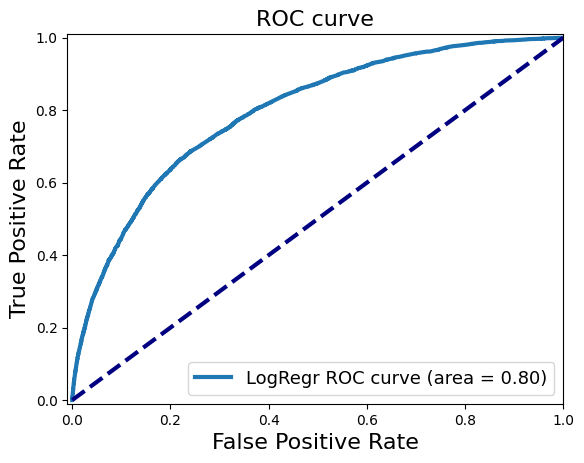

In [90]:
logRege_roc_curve(LR)

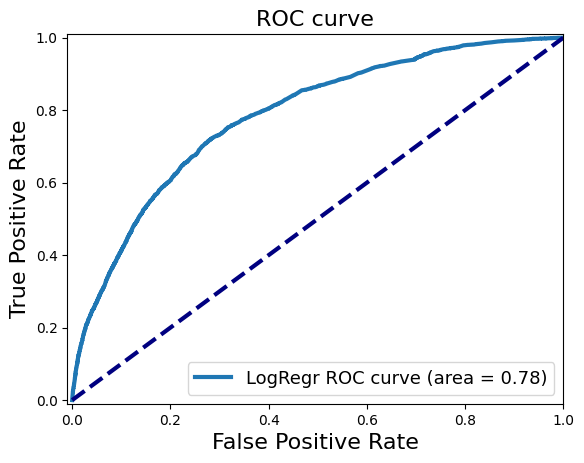

In [91]:
logRege_roc_curve(gnb)

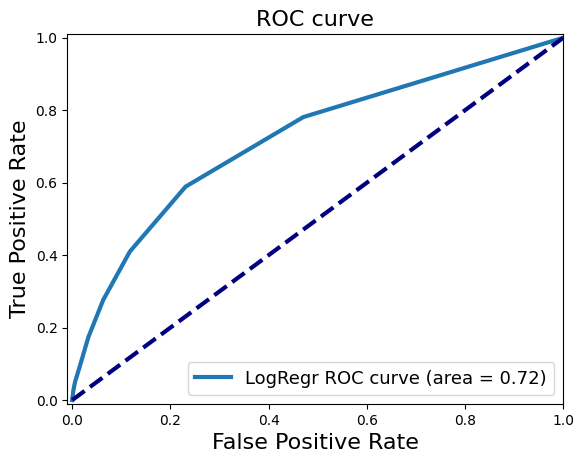

In [92]:
logRege_roc_curve(knn)

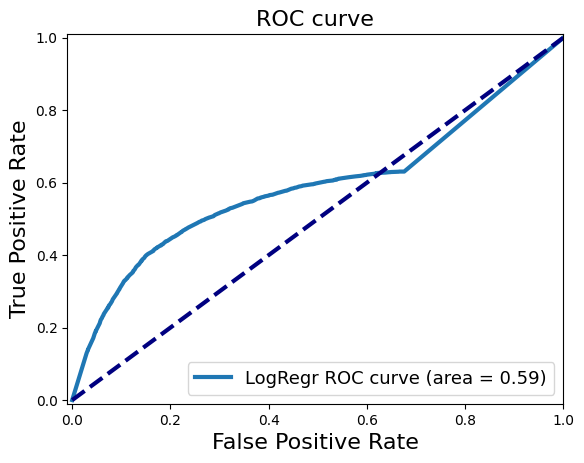

In [93]:
logRege_roc_curve(dt)